In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [2]:
nmono = 7200
num_trials = 250
target_extent = 0.9
trials_nums = []
trials_pairs = []
trials_extent = []


for trial in range(num_trials):
    nums = np.array([1 for i in range(nmono)])
    pairs= []
    extent_list = []
    sum_matrix = (np.ones((np.amax(nums),np.amax(nums))))/len(nums)
    extent = (nmono-len(nums))/nmono
    while extent < target_extent:
        new_nums = []
        #pick chain to react
        chain1_id = random.choice(range(len(nums)))

        #pick second reacting chain based on probability of reaction with chain of length of 1st chain
        chain2_id = random.choices(range(len(nums)),weights=[sum_matrix[nums[chain1_id]-1,choice-1] for choice in nums])

        #reroll if chains match
        if chain1_id == chain2_id:
            while chain1_id == chain2_id[0]:
                chain2_id = random.choices(range(len(nums)),weights=[sum_matrix[nums[chain1_id]-1,choice-1] for choice in nums])

        #perform sums
        for i,entry in enumerate(nums):
            if i==chain1_id:
                new_nums.append(nums[chain1_id] + nums[chain2_id[0]])
                pairs.append(sorted((nums[chain1_id],nums[chain2_id[0]])))
            elif i == chain2_id[0]:
                pass
            else:
                new_nums.append(entry)

        #store results and prepare for next iteration
        nums = np.copy(new_nums)
        sum_matrix = (np.ones((np.amax(nums),np.amax(nums))))/len(nums)
        extent_list.append(extent)
        extent = (nmono-len(nums))/nmono
    trials_nums.append(nums)
    trials_pairs.append(pairs)
    trials_extent.append(extent_list)

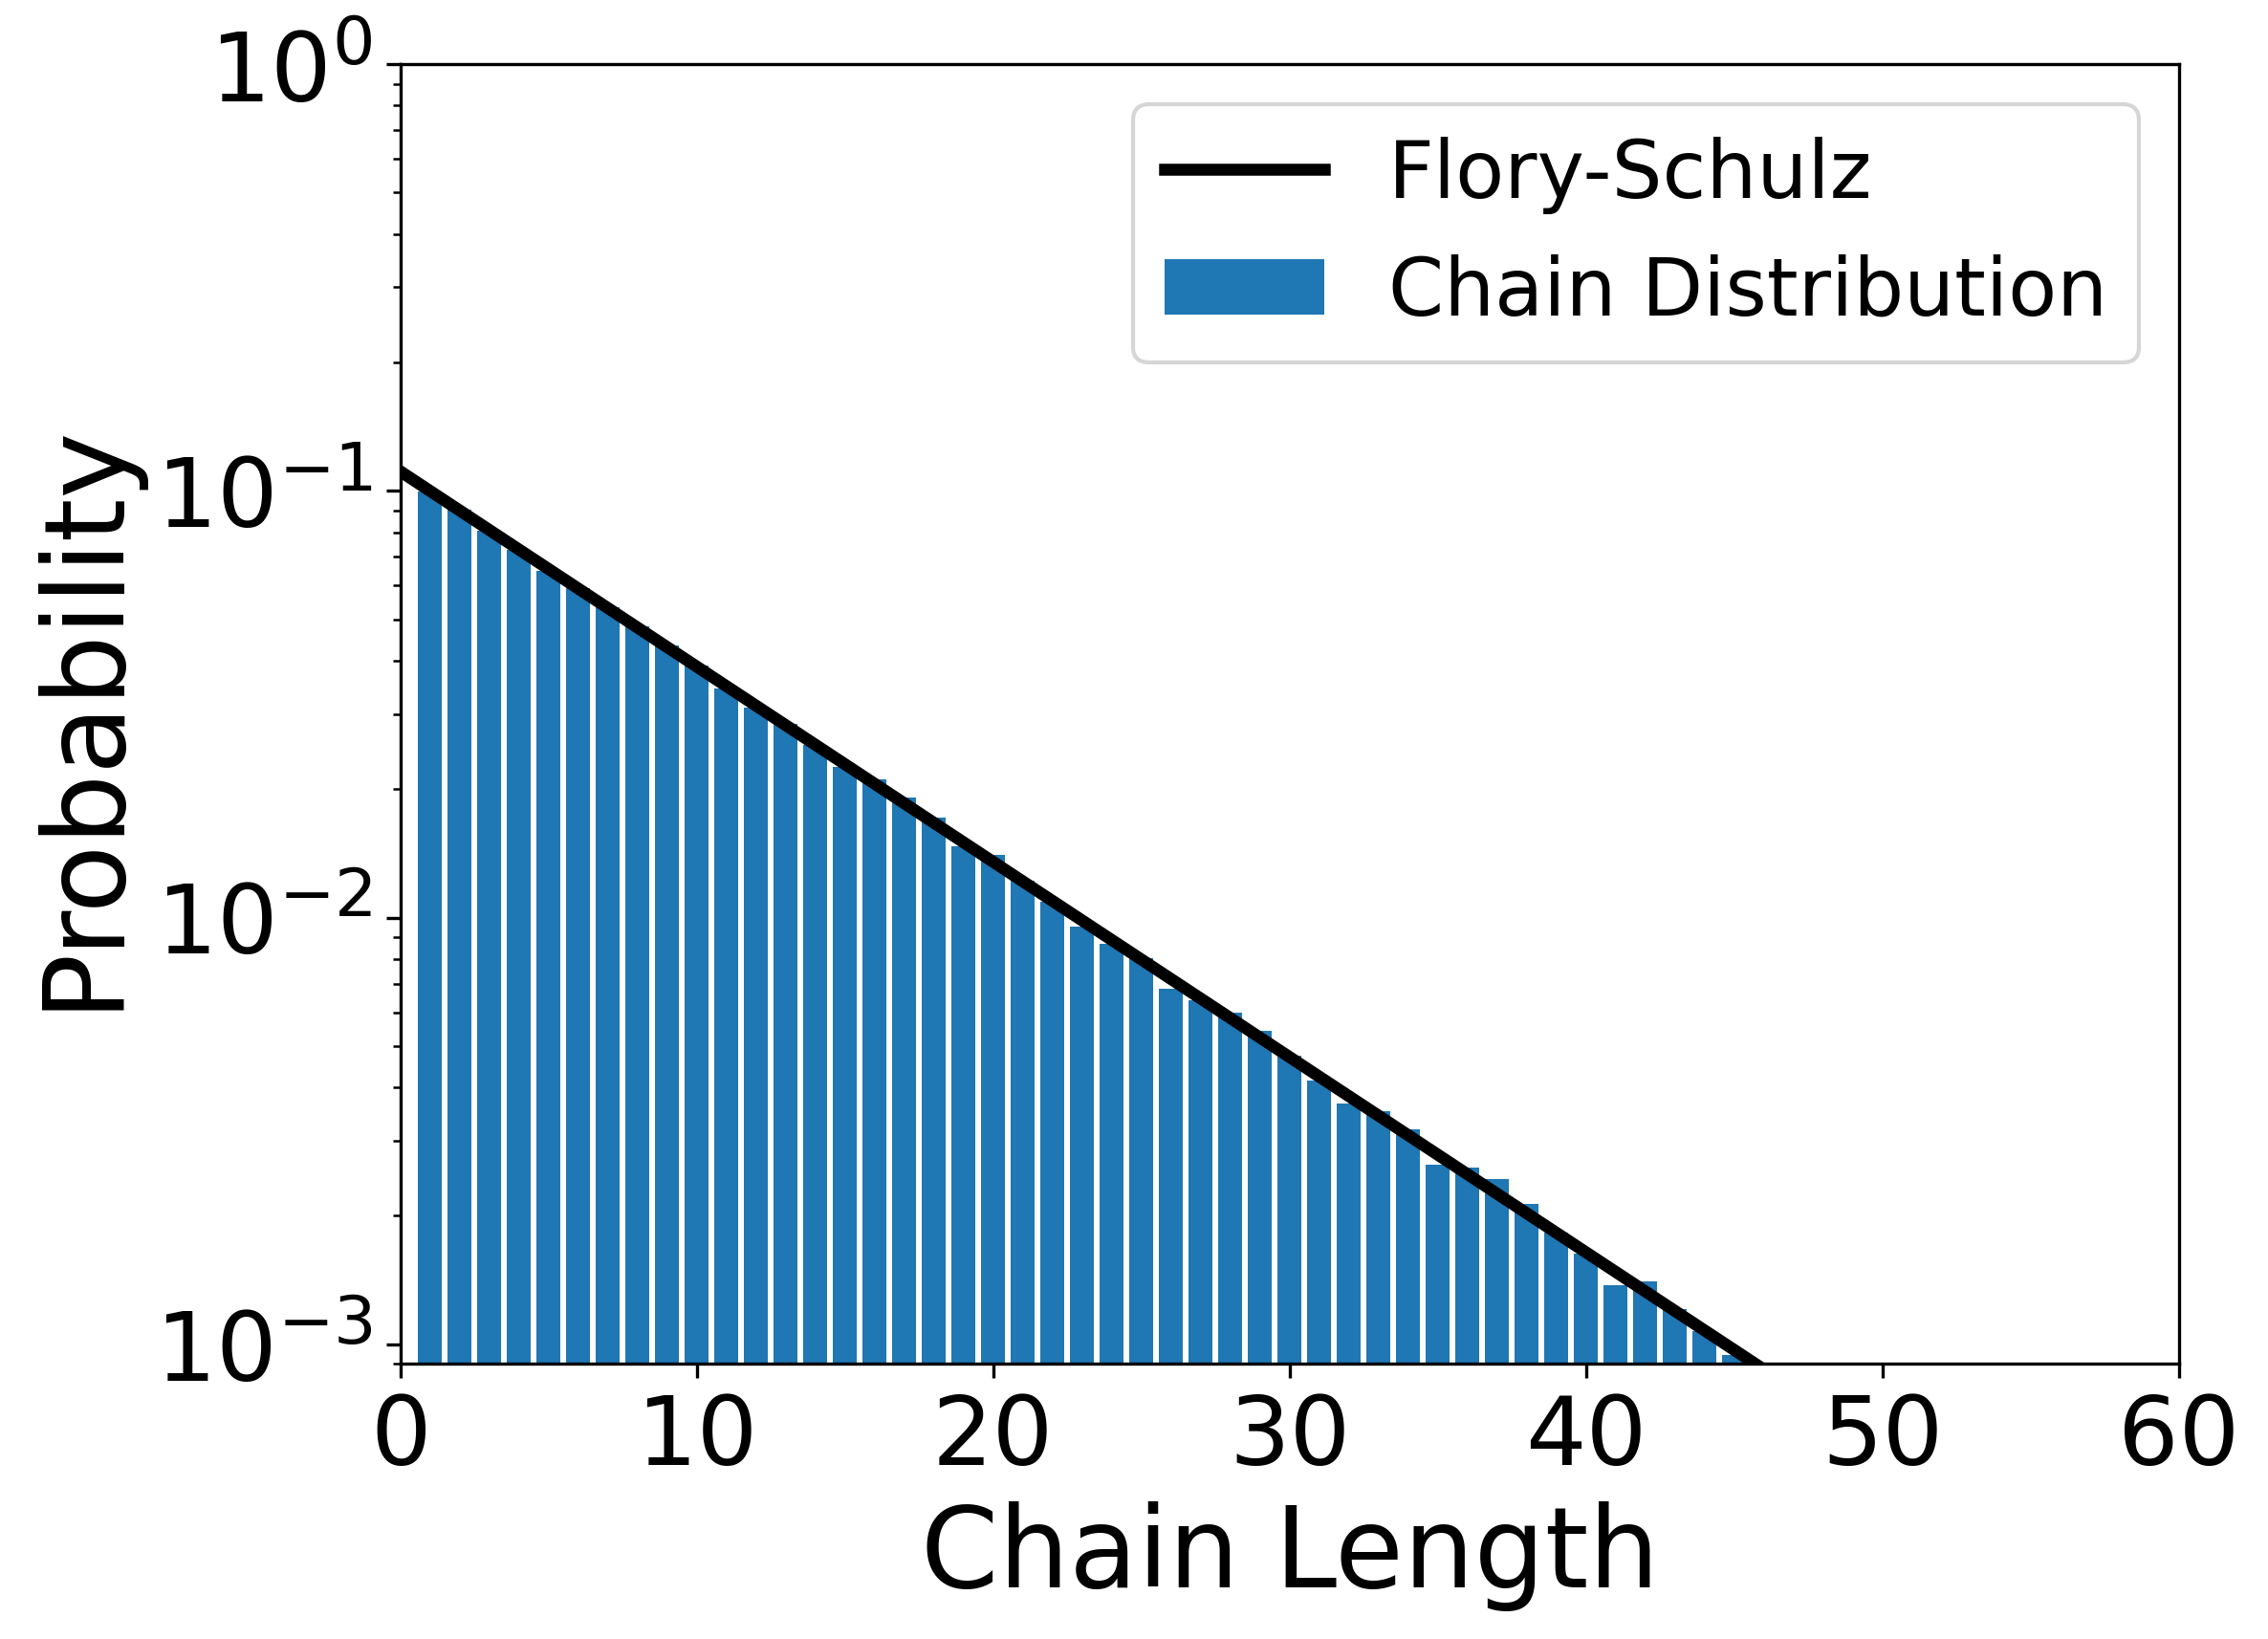

In [3]:
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 300

lw = 3.



x_chain_FS = np.linspace(0,100,101)
x_chain = np.linspace(0,max([np.amax(nums) for nums in trials_nums]),max([np.amax(nums) for nums in trials_nums])+1)
chain_dist = np.zeros(len(x_chain))
for trial in trials_nums:
    for entry in trial:
        chain_dist[entry]+=1
fig,ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(x_chain_FS, ((1-extent)*extent**(x_chain_FS-1)),'-k',linewidth=lw)
ax.bar(x_chain,chain_dist/np.sum(chain_dist),align='center')

ax.set_xlabel('Chain Length')
ax.set_ylabel('Probability')
ax.set_xlim((0,60))
ax.set_yscale('log')
ax.set_ylim((9e-4,1))
#ax.text(30,0.2,label)
ax.legend(('Flory-Schulz','Chain Distribution'));
#fig.savefig('MC_chain_uniform_FS.png',dpi=300, bbox_inches='tight')

In [4]:
# print(len(extent_list))
# print(len(pairs))
# print(extent_list[int(len(extent_list)/3)])
# #print(extent_list[int(2*len(extent_list)/3)+1])
# print(trials_extent)

with open('./MC_FS_pairs.pickle','wb') as f:
    pickle.dump(trials_pairs,f)
with open('./MC_FS_nums.pickle','wb') as f:
    pickle.dump(trials_nums,f)
with open('./MC_FS_extent.pickle','wb') as f:
    pickle.dump(extent_list,f)